### MODUL-MODUL YANG DIGUNAKAN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pytrends.request import TrendReq
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

### Proses Crawling data menggunakan pytrend

In [3]:
pytrend = TrendReq(hl='id-IDN', tz=90)

In [4]:
kw_list = ["jokowi"]

In [5]:
pytrend.build_payload(kw_list, cat=0, timeframe='2014-11-17 2019-11-17',geo='',gprop='')

#Interest Over Time
interest_over_time_df = pytrend.interest_over_time()

In [6]:
i_o_t=pd.DataFrame(interest_over_time_df,index=None)

In [7]:
i_o_t=i_o_t.reset_index()

### DATA

Data yang digunakan adalah overtime mengenai JOKOWI(topik). Disini terdapat 2 variabel yakni date dan overtime

Date adalah tanggal pencarian(5 tahun terakhir sampai 17 November 2019)

Jokowi dalam hal ini adalah keyword ( Overtime mengenai jokowi/minggu).



In [8]:
i_o_t.head(10)

,date,jokowi,isPartial
0,2014-11-23,27,False
1,2014-11-30,21,False
2,2014-12-07,18,False
3,2014-12-14,16,False
4,2014-12-21,15,False
5,2014-12-28,14,False
6,2015-01-04,12,False
7,2015-01-11,15,False
8,2015-01-18,17,False
9,2015-01-25,21,False


In [9]:
i_o_t.columns=['date','jokowi','ispartial']

In [10]:
i_o_t.columns

Index(['date', 'jokowi', 'ispartial'], dtype='object')

#### EDA dan Cleaning Data

Sebelum dilakukan visualisasi terhadap data , terlebih dahulu kita lakukan cleaning data.



In [11]:
i_o_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
date         261 non-null datetime64[ns]
jokowi       261 non-null int32
ispartial    261 non-null object
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 5.2+ KB


dapat dilihat bahwa tipe data diatas sudah sesuai, selajutnya kita akan menghapus kolom ispartial karena disini hanya akan digunakan dua variabel seperti yang sudah dijelaskan sebelumnya.

In [12]:
df=i_o_t.drop(['ispartial'],axis=1)

Mengecek Missing values

In [13]:
# Mendapatkan jumlah data yang hilang
missing_values_count = df.isnull().sum()


missing_values_count[0:2]

date      0
jokowi    0
dtype: int64

### Visualization

1. Top Chart google

In [184]:
#tahun 2014
pytrend = TrendReq(hl='id-IDN', tz=90)

top_charts_df = pytrend.top_charts(2014, hl='id-IDN', tz=90, geo='ID')
print(top_charts_df.head())

                 title exploreQuery
0               Jokowi             
1              Prabowo             
2            CPNS 2014             
3                 ISIS             
4  Sakitnya Tuh Disini             


In [185]:
top_charts_df=pd.DataFrame(top_charts_df,)

In [186]:
top_charts_df


,title,exploreQuery
0,Jokowi,
1,Prabowo,
2,CPNS 2014,
3,ISIS,
4,Sakitnya Tuh Disini,
5,Nagita Slavina,
6,MH 370,
7,Pilpres 2014,
8,Kabinet Jokowi,
9,Ebola,


In [167]:
#tahun 2018
top_charts_df2 = pytrend.top_charts(2018, hl='id-IDN', tz=90, geo='ID')
print(top_charts_df2.head())

                   title exploreQuery
0             Dilan 1990             
1  Avengers Infinity War             
2        Fantastic Beast             
3                The Nun             
4          Black Panther             


In [148]:
cv=['Dilan 1990']
pytrend.build_payload(cv, cat=0, timeframe='2018-1-1 2018-12-31',geo='',gprop='')

#Interest Over Time
it = pytrend.interest_over_time()

In [151]:
it.head()

,Dilan 1990,isPartial
date,,
2018-01-07,3,False
2018-01-14,9,False
2018-01-21,39,False
2018-01-28,92,False
2018-02-04,65,False


2. Data Overtime

In [197]:
df.head()

,date,jokowi
0,2014-11-23,27
1,2014-11-30,21
2,2014-12-07,18
3,2014-12-14,16
4,2014-12-21,14


In [35]:
a=df.loc[0:5,:]

In [37]:
len(a)

6

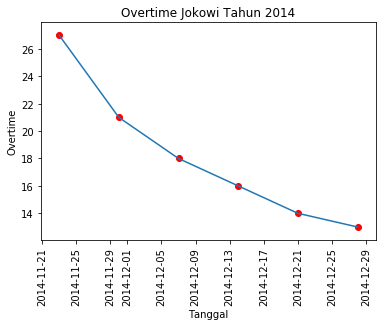

In [199]:
fig, ax1 = plt.subplots()
plt.plot(a.date, a.jokowi)
plt.scatter(a.date,a.jokowi, color='red')
plt.xlabel('Tanggal')
plt.xticks(rotation=90)
plt.ylabel('Overtime')
plt.title('Overtime Jokowi Tahun 2014')
plt.show() 

In [49]:
a2=df.loc[6:57,:]
len(a2)

52

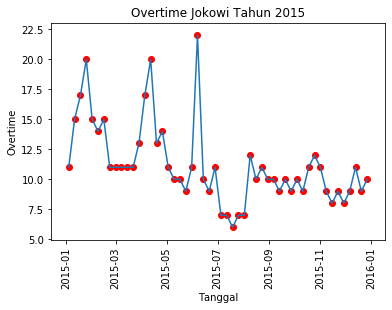

In [200]:
plt.plot(a2.date, a2.jokowi)
plt.scatter(a2.date,a2.jokowi, color='red')
plt.xlabel('Tanggal')
plt.xticks(rotation=90)
plt.ylabel('Overtime')
plt.title('Overtime Jokowi Tahun 2015')
plt.show() 

In [55]:
a3=df.loc[58:109,:]
len(a3)

52

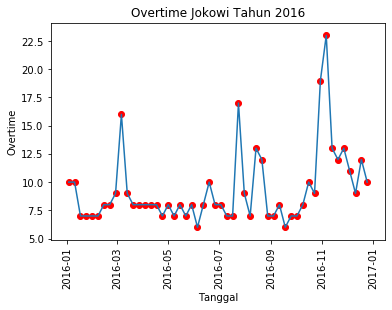

In [201]:
plt.plot(a3.date, a3.jokowi)
plt.scatter(a3.date,a3.jokowi, color='red')
plt.xlabel('Tanggal')
plt.xticks(rotation=90)
plt.ylabel('Overtime')
plt.title('Overtime Jokowi Tahun 2016')
plt.show() 

In [64]:
a4=df.loc[110:162,:]
len(a4)

53

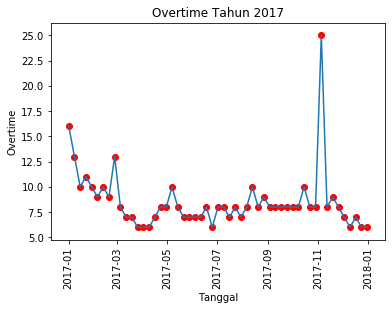

In [202]:
plt.plot(a4.date, a4.jokowi)
plt.scatter(a4.date,a4.jokowi, color='red')
plt.xlabel('Tanggal')
plt.xticks(rotation=90)
plt.ylabel('Overtime')
plt.title('Overtime Tahun 2017')
plt.show() 

In [69]:
a5=df.loc[163:214,:]
len(a5)

52

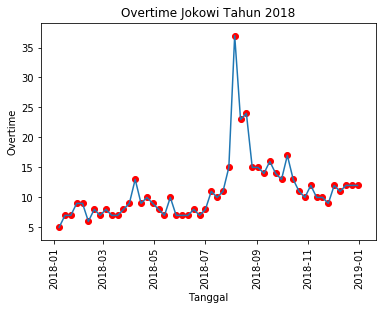

In [203]:
plt.plot(a5.date, a5.jokowi)
plt.scatter(a5.date,a5.jokowi, color='red')
plt.xlabel('Tanggal')
plt.xticks(rotation=90)
plt.ylabel('Overtime')
plt.title('Overtime Jokowi Tahun 2018')
plt.show() 

In [73]:
a6=df.loc[215:260,:]
len(a6)

45

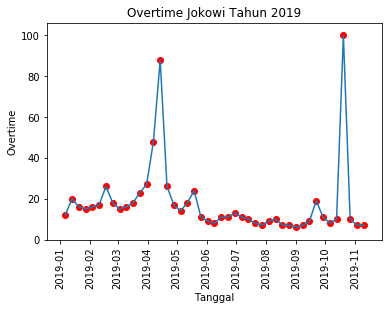

In [205]:
plt.plot(a6.date, a6.jokowi)
plt.scatter(a6.date,a6.jokowi, color='red')
plt.xlabel('Tanggal')
plt.xticks(rotation=90)
plt.ylabel('Overtime')
plt.title('Overtime Jokowi Tahun 2019')
plt.show() 

3. Interest by Region

In [92]:
pytrend.build_payload(kw_list, cat=0, timeframe='2014-11-17 2019-11-17',gprop='')

# Region
r=pytrend.interest_by_region(resolution='Region')

In [94]:
r=pd.DataFrame(r)
r.head(25)

,jokowi
geoName,
Afganistan,0
Afrika Selatan,0
Albania,0
Aljazair,0
Amerika Serikat,0
Andorra,0
Angola,0
Anguilla,0
Antartika,0


4. Related Topic

In [90]:
pytrend.build_payload(kw_list, cat=0, timeframe='2014-11-17 2019-11-17',geo='',gprop='')

# Rltd
rltd=pytrend.related_topics()

In [91]:
rltd

{'jokowi': {'rising':     value formattedValue                                               link  \
  0   27300     Naik tajam  /trends/explore?q=/m/03ggzf&date=2014-11-17+20...   
  1   20900     Naik tajam  /trends/explore?q=/m/04n4sh3&date=2014-11-17+2...   
  2    9350     Naik tajam  /trends/explore?q=/g/120lqmhj&date=2014-11-17+...   
  3    7250     Naik tajam  /trends/explore?q=/m/0253sb&date=2014-11-17+20...   
  4    6950     Naik tajam  /trends/explore?q=/m/0j5vnmx&date=2014-11-17+2...   
  5    6850     Naik tajam  /trends/explore?q=/g/120jx0ps&date=2014-11-17+...   
  6    6650     Naik tajam  /trends/explore?q=/m/0bwj_gq&date=2014-11-17+2...   
  7    5650     Naik tajam  /trends/explore?q=/g/11gbk2vqm5&date=2014-11-1...   
  8    5200     Naik tajam  /trends/explore?q=/m/09s0z&date=2014-11-17+201...   
  9    3950        +3.950%  /trends/explore?q=/g/11bc87mbhr&date=2014-11-1...   
  10   3650        +3.650%  /trends/explore?q=/g/120z_27z&date=2014-11-17+...   
  11   3

5.Related Queries

In [95]:
pytrend.build_payload(kw_list, cat=0, timeframe='2016-12-14 2017-01-25',gprop='')

# Rltd q
rltd1=pytrend.related_queries()

In [96]:
rltd1

{'jokowi': {'top':                          query  value
  0            undercover jokowi    100
  1              presiden jokowi     54
  2                         ahok     51
  3                  buku jokowi     49
  4                  jokowi ahok     49
  5                    indonesia     46
  6                   jokowi pki     35
  7       buku jokowi undercover     34
  8                          pki     34
  9                  foto jokowi     25
  10               berita jokowi     24
  11                      berita     23
  12              tentang jokowi     21
  13                 anak jokowi     19
  14       isi jokowi undercover     19
  15                         sby     17
  16  isi buku jokowi undercover     17
  17              jokowi terbaru     14
  18                 bambang tri     10
  19          bambang tri jokowi     10
  20             jokowi hari ini     10
  21                jaket jokowi     10
  22               gambar jokowi      9
  23                   

### Modelling

Disini digunakan SVR  dengan fungsi kernel Radial Basis Support (RBF).


Variabel X=Overtime(jokowi)

Variabel Y= Overtime+1(jokowi)

In [14]:
X=df.iloc[0:258,:]

Y=df.iloc[1:259,:]

In [15]:
X1=X.jokowi
X1=pd.DataFrame(X1)
print(X1)


     jokowi
0        27
1        21
2        18
3        16
4        15
..      ...
253      11
254       8
255      10
256     100
257      11

[258 rows x 1 columns]


In [16]:
Y1=Y.jokowi
Y1=pd.DataFrame(Y1)
print(Y1)

     jokowi
1        21
2        18
3        16
4        15
5        14
..      ...
254       8
255      10
256     100
257      11
258       6

[258 rows x 1 columns]


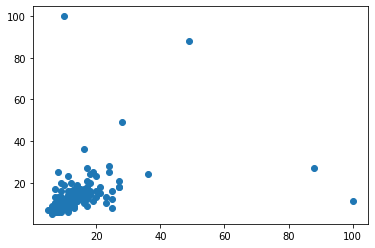

In [17]:
plt.scatter(X1,Y1)

In [18]:
import numpy as np
X_ = np.asarray(X1)
X_[0:5]

array([[27],
       [21],
       [18],
       [16],
       [15]])

In [19]:
Y_=np.asarray(Y1)
Y_[0:5]

array([[21],
       [18],
       [16],
       [15],
       [14]])

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_,Y_)
  

Setelah itu dilakukan penentuan parameter terbaik pada SVR dengan kernel RBF. Disini digunakan beberapa nilai gamma dari 5 hingga 10.

In [40]:
from sklearn.model_selection import GridSearchCV, cross_validate
import math
def model(xtrain, ytrain):
    gcs = GridSearchCV(SVR(kernel='rbf'),
                       param_grid={'gamma': [5, 6, 7, 8, 9, 10]},
                       cv=5,
                       scoring='neg_mean_squared_error')
    grid_result = gcs.fit(xtrain, ytrain)
    best_params = grid_result.best_params_
    best_svr = SVR(kernel='rbf', C=1e3, gamma=best_params["gamma"])
    best_svr.fit(xtrain, ytrain)
    y_pred = best_svr.predict(xtest)
    scoring = {
               'abs_error': 'neg_mean_absolute_error',
               'squared_error': 'neg_mean_squared_error'}

    scores = cross_validate(best_svr, xtrain, ytrain, cv=10, scoring=scoring, return_train_score=True)
    return "MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean()))
    



Untuk melihat apakah pembentukan model prediksi yang dibuat sudah mendekati nilai data sebenarnya, dapat dilihat dengan melihat plot hasil prediksi dengan data sebenarnya

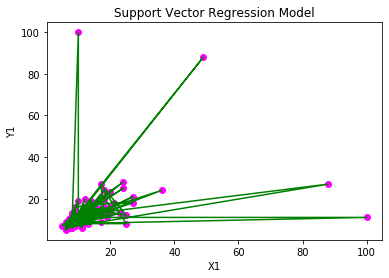

In [41]:
plt.scatter(xtrain, ytrain, color = 'magenta')
plt.plot(xtrain, ytrain, color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.show()

untuk memastikan bahwa model ini sudah bagus atau tidak dapat dipastikan dengan melihat Mean Ablosute Error(MAE) dan Root Mean Square Error (RMSE). 

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model(xtrain,ytrain)


('MAE :', 2.9441863219192546, '| RMSE :', 9.182735770776635)

In [43]:
print('R^2: {0:.3f}'.format(r2_score(ytest, y_pred)))

R^2: 0.213


Intrepretasi

Bisa dilihat bahwa MAE=2.94 dan RMSE 9.18.

R² yang bernilai 0.213 menandakan bahwa variabel X(Overtime 1) berpengaruh terhadap variabel Y(Overtime+1) sebesar 21.3 % dan sisanya dijlskan oleh variabel lainnya